# D22027_Loan Status Prediction

Submitted by

**D22002-Agasthyakrishna Viswanathan Panicker**

**D22027-N.Maheshkumar**

**Problem Statement:** This is a classification problem in which we need to classify whether the loan will be approved or not.This is a Binary Classification problem in which we need to predict our Target label which is “Loan Status”.

# PPP - Loan Data

In [233]:
# Import Required Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 

In [234]:
df = pd.read_csv("Loans_Training_Set.csv")

In [235]:
data = df.copy()

In [236]:
#no of rows and columns
data.shape

(111107, 19)

In [237]:
#Checking the datatypes
data.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit              object
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [238]:
#Check For duplicates
data[data.duplicated('Customer ID')]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
88910,a9382c50-9176-4639-9fa1-6bdf32fe9702,6fdbbbd6-0e34-4039-9f47-c371d352bf40,Fully Paid,20891,Long Term,714.0,10+ years,Home Mortgage,88537.0,Debt Consolidation,1719.09,18.0,NaN,13,0,56708,60456,0.0,0.0
88911,f73698be-9319-4e6e-b241-658f68e84df8,cc3e7689-746d-4c21-9ed7-0ea3e372d9e0,Fully Paid,24329,Long Term,711.0,3 years,Own Home,71973.0,Debt Consolidation,1547.41,18.7,42.0,12,0,16961,18237,0.0,0.0
88912,e7569ce9-f3ec-4461-9604-ccefe9164788,b9aefd67-0d4f-4180-805f-6c1870e280c3,Fully Paid,11000,Long Term,707.0,7 years,Rent,52640.0,Debt Consolidation,666.76,8.8,14.0,7,0,1946,11446,0.0,0.0
88913,96d15e73-541a-44be-8c11-b2e46d73d1b8,78281f18-48b5-40d4-9064-be5d18263d04,Fully Paid,5924,Short Term,716.0,7 years,Rent,97743.0,Debt Consolidation,2248.08,22.0,NaN,5,0,62261,69956,0.0,0.0
88914,12adaace-17a8-4bbe-a6ce-dc5ffcc46f54,fc4ad10d-b42d-4c44-89fd-ac33c8bdbffe,Fully Paid,11145,Short Term,685.0,2 years,Home Mortgage,61998.0,other,503.74,13.1,28.0,5,0,296,17424,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Fully Paid,15654,Long Term,686.0,10+ years,Rent,43050.0,Debt Consolidation,889.69,14.1,49.0,18,0,14730,29757,0.0,0.0
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Fully Paid,15237,Short Term,706.0,10+ years,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,48.0,11,0,17733,23060,0.0,0.0
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Fully Paid,10413,Short Term,719.0,5 years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,NaN,11,0,5205,6348,0.0,0.0
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Fully Paid,34447,Short Term,626.0,10+ years,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,9.0,12,0,32318,37580,0.0,0.0


In [239]:
# dropping ALL duplicate values
data.drop_duplicates(subset="Customer ID",inplace=True)

In [240]:
len(data)

88910

In [241]:
# count duplicate values in courses column
df2 = len(data['Loan ID'])-len(data['Loan ID'].drop_duplicates())
print(df2)

0


In [242]:
# Checking No of Null values in each feature
data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             3817
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48506
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      192
Tax Liens                           8
dtype: int64

In [243]:
#Dropping the unnecessary Columns
data=data.drop(["Loan ID","Customer ID"],axis=1)

In [244]:
data

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,Fully Paid,10136,Short Term,728.0,10+ years,Rent,35476.0,Debt Consolidation,567.62,21.2,14.0,14,0,15914,28265,0.0,0.0
88906,Fully Paid,29610,Short Term,710.0,10+ years,Home Mortgage,123375.0,Debt Consolidation,2508.63,15.0,16.0,11,0,17727,32766,0.0,0.0
88907,Fully Paid,24394,Short Term,746.0,NaN,Home Mortgage,71148.0,Debt Consolidation,818.2,36.4,9.0,8,0,44728,53374,0.0,0.0
88908,Charged Off,5030,Short Term,722.0,NaN,Rent,25424.0,Debt Consolidation,360.17,19.0,7.0,12,0,6374,18422,0.0,0.0


In [245]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,8.891000e+04,67572.000000,6.757200e+04,88910.000000,40404.000000,88910.000000,88910.000000,8.891000e+04,88718.000000,88902.000000
mean,1.433878e+07,1199.199580,7.234575e+04,18.315313,35.080289,11.110348,0.160477,1.543593e+04,0.112672,0.028222
std,3.502996e+07,1680.813805,5.836101e+04,7.049175,22.008583,4.978461,0.473746,1.965873e+04,0.343300,0.257533
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.283000e+03,714.000000,4.458600e+04,13.500000,16.000000,8.000000,0.000000,5.949000e+03,0.000000,0.000000
50%,1.435500e+04,733.000000,6.149400e+04,17.000000,32.000000,10.000000,0.000000,1.103900e+04,0.000000,0.000000
75%,2.448500e+04,744.000000,8.675025e+04,21.800000,51.000000,14.000000,0.000000,1.930100e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.000000,15.000000


In [246]:
# Getting the proportion of null values in each column
(data.isnull().sum()*100)/len(data)

Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                    23.999550
Years in current job             4.293105
Home Ownership                   0.000000
Annual Income                   23.999550
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.000000
Months since last delinquent    54.556293
Number of Open Accounts          0.000000
Number of Credit Problems        0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.000000
Bankruptcies                     0.215949
Tax Liens                        0.008998
dtype: float64

In [247]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [248]:
#Finding Missing Value Percentage
missing_values_table(data)

Your selected dataframe has 17 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,48506,54.6
Credit Score,21338,24.0
Annual Income,21338,24.0
Years in current job,3817,4.3
Bankruptcies,192,0.2
Tax Liens,8,0.0


In [249]:
data.shape #Shape of the data

(88910, 17)

# Data Cleaning & Pre-Processing

**1. Loan Status** - A categorical variable indicating if the loan was paid back or defaulted.

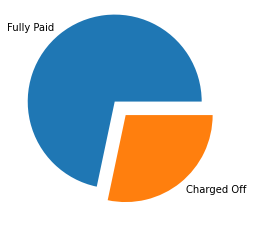

In [250]:
plt.pie(data[['Loan Status']].value_counts(),labels =['Fully Paid', 'Charged Off'],explode = (0.2,0))
plt.show()

In [251]:
# Frequency Distribution
table = pd.crosstab(data["Loan Status"],columns="Loan Status")
table["Percentage"] = pd.crosstab(data["Loan Status"],columns="Term",normalize=True)*100
table
# Observation : Nearly 72% of the observations belongs to target class 'Fully Paid' whereas nearly 28% belongs to 'Charged Off'

col_0,Loan Status,Percentage
Loan Status,,
Charged Off,25173,28.312901
Fully Paid,63737,71.687099


--------------------------------------------------------------------------------------------------------------------------------

**2. Current Loan Amount** - This is the loan amount that was either completely paid off, or the amount that was defaulted.

In [252]:
data["Current Loan Amount"].value_counts

<bound method IndexOpsMixin.value_counts of 0        12232
1        25014
2        16117
3        11716
4         9789
         ...  
88905    10136
88906    29610
88907    24394
88908     5030
88909    18446
Name: Current Loan Amount, Length: 88910, dtype: int64>

In [253]:
data[data["Current Loan Amount"] == 99999999]

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5044,Fully Paid,99999999,Short Term,739.0,3 years,Home Mortgage,60012.0,Home Improvements,1295.26,16.6,33.0,16,0,427,8542,0.0,0.0
5045,Fully Paid,99999999,Short Term,704.0,9 years,Rent,54802.0,Debt Consolidation,1114.31,16.9,30.0,12,0,4716,5822,0.0,0.0
5046,Fully Paid,99999999,Short Term,751.0,5 years,Rent,35693.0,Debt Consolidation,626.12,11.0,NaN,7,0,742,9166,0.0,0.0
5047,Fully Paid,99999999,Short Term,735.0,NaN,Home Mortgage,33884.0,Debt Consolidation,683.34,18.9,10.0,12,0,10835,18028,0.0,0.0
5048,Fully Paid,99999999,Short Term,745.0,3 years,Own Home,103343.0,Debt Consolidation,1300.41,14.1,NaN,14,0,22746,42835,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,Fully Paid,99999999,Short Term,714.0,6 years,Rent,52052.0,Debt Consolidation,750.42,16.3,35.0,6,0,5622,5905,0.0,0.0
17778,Fully Paid,99999999,Long Term,701.0,1 year,Home Mortgage,45604.0,Debt Consolidation,619.46,12.9,NaN,15,0,6889,10900,0.0,0.0
17779,Fully Paid,99999999,Short Term,743.0,10+ years,Rent,76144.0,Debt Consolidation,666.26,18.3,94.0,11,0,12954,44062,0.0,0.0
17780,Fully Paid,99999999,Short Term,733.0,< 1 year,Rent,121788.0,Debt Consolidation,864.69,14.9,48.0,8,0,14916,20294,0.0,0.0


In [254]:
# Replacing every instance of 'HaveMortgage' with 'Home Mortgage'
data['Current Loan Amount'] = data['Current Loan Amount'].apply(lambda x: np.nan if x== 99999999 else x)

In [255]:
data['Current Loan Amount'].isnull().sum()

12738

In [256]:
#The Null values will be imputed with k-NN imputer later

--------------------------------------------------------------------------------------------------------------------------------

**3. Term** - A categorical variable indicating if it is a short term or long term loan.

In [257]:
# Frequency Distribution
table = pd.crosstab(data["Term"],columns="Term")
table["Percentage"] = pd.crosstab(data["Term"],columns="Term",normalize=True)*100
table

col_0,Term,Percentage
Term,,
Long Term,21978,24.719379
Short Term,66932,75.280621


--------------------------------------------------------------------------------------------------------------------------------

**4. Credit Score** - A value between 0 and 800 indicating the riskiness of the borrowers credit history.

In [258]:
data["Credit Score"].value_counts

<bound method IndexOpsMixin.value_counts of 0        7280.0
1        7330.0
2        7240.0
3        7400.0
4        6860.0
          ...  
88905     728.0
88906     710.0
88907     746.0
88908     722.0
88909     718.0
Name: Credit Score, Length: 88910, dtype: float64>

In [259]:
# The credit score as specified in the data dictionary are in the range of 0 to 800. but some of the values are in range of 7000
data['Credit Score'] = data['Credit Score'].apply(lambda x: x/10 if x>800 else x)

In [260]:
data["Credit Score"].value_counts

<bound method IndexOpsMixin.value_counts of 0        728.0
1        733.0
2        724.0
3        740.0
4        686.0
         ...  
88905    728.0
88906    710.0
88907    746.0
88908    722.0
88909    718.0
Name: Credit Score, Length: 88910, dtype: float64>

--------------------------------------------------------------------------------------------------------------------------------

**5.Years in current job** - A categorical variable indicating how many years the customer has been in their current job.

In [261]:
# Frequency Distribution
table = pd.crosstab(data["Years in current job"],columns="Years in current job")
table["Percentage"] = pd.crosstab(data["Years in current job"],columns="Years in current job",normalize=True)*100
table

col_0,Years in current job,Percentage
Years in current job,,
1 year,5765,6.774940
10+ years,27410,32.211815
2 years,8187,9.621238
3 years,7263,8.535367
4 years,5474,6.432962
5 years,6084,7.149824
6 years,5095,5.987567
7 years,4943,5.808938
8 years,4098,4.815907


In [262]:
data["Years in current job"].isnull().sum()

3817

In [263]:
# Determining the conditional mode for Years in current job column
print(data[data['Loan Status']=='Fully Paid']['Years in current job'].mode())
print(data[data['Loan Status']=='Charged Off']['Years in current job'].mode())

0    10+ years
Name: Years in current job, dtype: object
0    10+ years
Name: Years in current job, dtype: object


In [264]:
# Filling the missing values with the mode since it's a categorical column
data['Years in current job'].fillna(value='10+ years',inplace=True)

In [265]:
data["Years in current job"].isnull().sum()

0

--------------------------------------------------------------------------------------------------------------------------------

**6. Home Ownership** - Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage",and "Own". If the value is OWN, then the customer is a home owner with no mortgage

In [266]:
# Frequency Distribution
table = pd.crosstab(data["Home Ownership"],columns="Home Ownership")
table["Percentage"] = pd.crosstab(data["Home Ownership"],columns="Home Ownership",normalize=True)*100
table

col_0,Home Ownership,Percentage
Home Ownership,,
HaveMortgage,170,0.191205
Home Mortgage,43270,48.667192
Own Home,8075,9.082218
Rent,37395,42.059386


In [267]:
# If You Notice above, there is a Category called 'HaveMortgage' which is not available as per Description, so it must be
# Home Mortgage instead of HaveMortgage

In [268]:
# Replacing every instance of 'HaveMortgage' with 'Home Mortgage'
data['Home Ownership'] = data['Home Ownership'].apply(lambda x: 'Home Mortgage' if x=='HaveMortgage' else x)

In [269]:
# Checking for the number of unique values in the Home Ownership series
data['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home'], dtype=object)

In [270]:
data['Home Ownership'].isnull().sum()

0

------------------------------------------------------------------------------------------------------------------------------

**7. Annual Income** - The customer's annual income

In [271]:
data["Annual Income"].value_counts

<bound method IndexOpsMixin.value_counts of 0         46643.0
1         81099.0
2         60438.0
3         34171.0
4         47003.0
           ...   
88905     35476.0
88906    123375.0
88907     71148.0
88908     25424.0
88909     44066.0
Name: Annual Income, Length: 88910, dtype: float64>

In [272]:
data["Annual Income"].isnull().sum()

21338

In [273]:
#The Null values will be imputed with k-NN imputer later

------------------------------------------------------------------------------------------------------------------------------

**8. Purpose** - A description of the purpose of the loan.

In [274]:
# Frequency Distribution
table = pd.crosstab(data["Purpose"],columns="Purpose")
table["Percentage"] = pd.crosstab(data["Purpose"],columns="Purpose",normalize=True)*100
table

col_0,Purpose,Percentage
Purpose,,
Business Loan,1328,1.493645
Buy House,559,0.628726
Buy a Car,1196,1.345181
Debt Consolidation,70447,79.234057
Educational Expenses,92,0.103475
Home Improvements,5206,5.855359
Medical Bills,955,1.074120
Other,2850,3.205489
Take a Trip,454,0.510629


In [275]:
data['Purpose'].nunique()

16

In [276]:
# replacing the instances of 'Other' with 'other'
data['Purpose'].replace({'Other':'other'},inplace=True)

In [277]:
data['Purpose'].nunique()

15

------------------------------------------------------------------------------------------------------------------------------

**9. Monthly Debt** - The customer's monthly payment for their existing loans

In [278]:
data["Monthly Debt"].value_counts

<bound method IndexOpsMixin.value_counts of 0         777.39
1         892.09
2        1244.02
3         990.94
4         503.71
          ...   
88905     567.62
88906    2508.63
88907      818.2
88908     360.17
88909     749.13
Name: Monthly Debt, Length: 88910, dtype: object>

In [279]:
# The monthly debt column had values of object type. 
# But when we tried to convert into 'float' type we encounterd an error due to the presence of '\\$' symbol. 
# Hence we are removing every instance containing the '$' symbol with a blank character to enable type conversion into integer.

In [280]:
#Removing $ sign
data["Monthly Debt"]= data["Monthly Debt"].str.replace("$","") #replacing $ with empty

# or use 
# Type conversion into integer
# loan['Monthly Debt'].replace({'\$':''},regex=True,inplace=True)

In [281]:
data["Monthly Debt"][10] # Dollar Sign Removed

'1051.41'

In [282]:
data["Monthly Debt"] = pd.to_numeric(data["Monthly Debt"]) #Converting Object to Numeric
data["Monthly Debt"].dtypes

dtype('float64')

------------------------------------------------------------------------------------------------------------------------------

**10. Years of Credit History**- The years since the first entry in the customers credit history

In [283]:
data["Years of Credit History"].describe()

count    88910.000000
mean        18.315313
std          7.049175
min          3.600000
25%         13.500000
50%         17.000000
75%         21.800000
max         70.500000
Name: Years of Credit History, dtype: float64

In [284]:
# Note : There are customers with around 70 years of credit history
data['Years of Credit History'].value_counts().sort_index(ascending=False)

70.5    1
65.0    1
62.5    1
60.5    2
59.9    1
       ..
4.0     5
3.9     2
3.8     2
3.7     1
3.6     1
Name: Years of Credit History, Length: 508, dtype: int64

------------------------------------------------------------------------------------------------------------------------------

**11. Months since last delinquent** - Months since the last loan delinquent payment

In [285]:
data['Months since last delinquent'].value_counts()

13.0     767
12.0     762
15.0     745
9.0      742
8.0      731
        ... 
152.0      1
139.0      1
130.0      1
115.0      1
143.0      1
Name: Months since last delinquent, Length: 116, dtype: int64

------------------------------------------------------------------------------------------------------------------------------

**12. Number of Open Accounts**- The total number of open credit cards

In [286]:
data['Number of Open Accounts'].value_counts().sort_index(ascending=True)

0        2
1       19
2      371
3     1145
4     2491
5     4167
6     6064
7     7324
8     7907
9     8362
10    8085
11    7630
12    6604
13    5532
14    4599
15    3813
16    3101
17    2565
18    1935
19    1666
20    1242
21     980
22     742
23     599
24     482
25     363
26     233
27     226
28     145
29     100
30      90
31      63
32      56
33      47
34      32
35      24
36      24
37      16
38      11
39       8
40       8
41       6
42       5
43       8
44       3
45       4
47       3
48       2
52       2
55       1
56       1
76       2
Name: Number of Open Accounts, dtype: int64

------------------------------------------------------------------------------------------------------------------------------

**13. Number of Credit Problems**-The number of credit problems in the customer records.

In [287]:
data['Number of Credit Problems'].value_counts()

0     77057
1     10271
2      1092
3       311
4       101
5        46
6        14
7         6
9         4
10        3
8         2
12        1
15        1
11        1
Name: Number of Credit Problems, dtype: int64

------------------------------------------------------------------------------------------------------------------------------

**14. Maximum Open Credit** - The maximum credit limit for all credit sources.

In [288]:
entry = data.loc[data['Maximum Open Credit'] == '#VALUE!']  #the rows which are having abnormal Values
entry.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
4930,Charged Off,2052.0,Short Term,703.0,10+ years,Rent,95105.0,Debt Consolidation,1910.02,22.4,37.0,9,0,0,#VALUE!,0.0,0.0
37357,Charged Off,1470.0,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0


In [289]:
#data = data.drop([4930,37357])   #Dropping the rows with #VALUE! (Better fill with Mean,Median,Mode)

In [290]:
data["Maximum Open Credit"]= pd.to_numeric(data["Maximum Open Credit"],errors = 'coerce') #Converting Object to numeric
data["Maximum Open Credit"].dtypes

dtype('float64')

In [291]:
data['Maximum Open Credit'][4930] #errors = coerce automatically removes #VALUE!

nan

In [292]:
data['Maximum Open Credit'][37357] #errors = coerce automatically removes #VALUE!

nan

In [293]:
# #Imputing with Conditional Mean

# # Determining the conditional mode for Tax Liens column
# print(data[data['Loan Status']=='Fully Paid']['Maximum Open Credit'].median())
# print(data[data['Loan Status']=='Charged Off']['Maximum Open Credit'].median())

In [294]:
#The Null values will be imputed with k-NN imputer later

------------------------------------------------------------------------------------------------------------------------------

**15. Bankruptcies** - The number of bankruptcies

In [295]:
data["Bankruptcies"].value_counts()

0.0    79323
1.0     8936
2.0      353
3.0       80
4.0       19
5.0        5
7.0        1
6.0        1
Name: Bankruptcies, dtype: int64

In [296]:
# Determining the conditional mode for Bankruptcies column
print(data[data['Loan Status']=='Fully Paid']['Bankruptcies'].mode())
print(data[data['Loan Status']=='Charged Off']['Bankruptcies'].mode())

0    0.0
Name: Bankruptcies, dtype: float64
0    0.0
Name: Bankruptcies, dtype: float64


In [297]:
# Filling the missing values with the mode since it's a categorical column
data['Bankruptcies'].fillna(value=0.0,inplace=True)

------------------------------------------------------------------------------------------------------------------------------

**16.Tax Liens** - The number of tax liens.

In [298]:
data['Tax Liens'].value_counts()

0.0     87274
1.0      1132
2.0       305
3.0        99
4.0        52
5.0        17
6.0         9
7.0         5
9.0         4
8.0         2
15.0        1
10.0        1
11.0        1
Name: Tax Liens, dtype: int64

In [299]:
data['Tax Liens'].isnull().sum()

8

In [300]:
# Determining the conditional mode for Tax Liens column
print(data[data['Loan Status']=='Fully Paid']['Tax Liens'].mode())
print(data[data['Loan Status']=='Charged Off']['Tax Liens'].mode())

0    0.0
Name: Tax Liens, dtype: float64
0    0.0
Name: Tax Liens, dtype: float64


In [301]:
# Filling the missing values with the mode since it's a categorical column
data['Tax Liens'].fillna(value=0.0,inplace=True)

In [302]:
data['Tax Liens'].isnull().sum()

0

------------------------------------------------------------------------------------------------------------------------------

## KNN Imputer to Fill Missing Values of Numeric Variable

In [303]:
data.dtypes

Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [304]:
#Excluding the Categorical Variable
data_before_knn = data.select_dtypes(exclude=['object'])
data_before_knn.dtypes

Current Loan Amount             float64
Credit Score                    float64
Annual Income                   float64
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [305]:
#Standardizing the data using minMax scalar so that KNN cant be biased
# import module
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
model=scaler.fit(data_before_knn)
scaled_data=model.transform(data_before_knn)
 
# creating a data frame to put into KNN imputer
scaled_before_knn=pd.DataFrame(scaled_data,columns=data_before_knn.columns)
scaled_before_knn

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0.331817,0.861446,0.004892,0.064483,0.215247,0.056818,0.157895,0.000000,0.003908,0.000114,0.000000,0.000000
1,0.693053,0.891566,0.008848,0.073997,0.345291,NaN,0.184211,0.000000,0.020634,0.001114,0.000000,0.000000
2,0.441612,0.837349,0.006476,0.103190,0.195815,0.181818,0.144737,0.066667,0.006516,0.000212,0.142857,0.000000
3,0.317234,0.933735,0.003460,0.082197,0.095665,NaN,0.276316,0.000000,0.004050,0.000622,0.000000,0.000000
4,0.262774,0.608434,0.004934,0.041782,0.195815,0.142045,0.171053,0.066667,0.009774,0.000279,0.142857,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
88905,0.272581,0.861446,0.003610,NaN,0.263079,0.079545,0.184211,0.000000,0.009196,0.000404,0.000000,0.000000
88906,0.822943,0.753012,0.013702,NaN,0.170404,0.090909,0.144737,0.000000,0.010244,0.000468,0.000000,0.000000
88907,0.675531,0.969880,0.007706,NaN,0.490284,0.051136,0.105263,0.000000,0.025847,0.000763,0.000000,0.000000
88908,0.128278,0.825301,0.002456,NaN,0.230194,0.039773,0.157895,0.000000,0.003683,0.000263,0.000000,0.000000


In [306]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

In [307]:
# # create an object for KNNImputer
# imputer = KNNImputer(n_neighbors=1)
# data_after_imputation = imputer.fit_transform(scaled_before_knn)

In [308]:
#Inverse transform of Knn Imputed File
#knn_imputed_data=pd.DataFrame(scaler.inverse_transform(data_after_imputation1),columns=data_before_knn.columns)

In [309]:
#data_after_imputation1  = pd.DataFrame(data_after_imputation)

In [310]:
#data_after_imputation1 .isnull().sum()

In [311]:
#knn_imputed_data

In [312]:
# saving the dataframe
#knn_imputed_data.to_csv('knn_imputed_data.csv')

In [313]:
# cat = data.select_dtypes(include='object')
# cat

In [314]:
# final_imputed_loanData =pd.concat([cat, knn_imputed_data], axis=1)
# final_imputed_loanData

In [315]:
# # saving the dataframe
# final_imputed_loanData.to_csv('final_imputed_loanData.csv')

In [316]:
final_imputed_loanData = pd.read_csv("final_imputed_loanData.csv")
final_imputed_loanData

,Loan Status,Term,Years in current job,Home Ownership,Purpose,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,Short Term,< 1 year,Rent,Debt Consolidation,12232,728,46643,777.39,18.0,10,12,0,6762,7946,0,0
1,Charged Off,Long Term,10+ years,Home Mortgage,Debt Consolidation,25014,733,81099,892.09,26.7,50,14,0,35706,77961,0,0
2,Charged Off,Short Term,9 years,Home Mortgage,Home Improvements,16117,724,60438,1244.02,16.7,32,11,1,11275,14815,1,0
3,Charged Off,Short Term,3 years,Rent,Debt Consolidation,11716,740,34171,990.94,10.0,21,21,0,7009,43533,0,0
4,Charged Off,Long Term,10+ years,Home Mortgage,Home Improvements,9789,686,47003,503.71,16.7,25,13,1,16913,19553,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,Fully Paid,Short Term,10+ years,Rent,Debt Consolidation,10136,728,35476,1680.19,21.2,14,14,0,15914,28265,0,0
88906,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,29610,710,123375,934.94,15.0,16,11,0,17727,32766,0,0
88907,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,24394,746,71148,767.87,36.4,9,8,0,44728,53374,0,0
88908,Charged Off,Short Term,10+ years,Rent,Debt Consolidation,5030,722,25424,596.37,19.0,7,12,0,6374,18422,0,0


# Exploratory Data Analysis

- Uni-variate Analysis of Numerical Variable

In [317]:
num = final_imputed_loanData.select_dtypes(exclude='object')

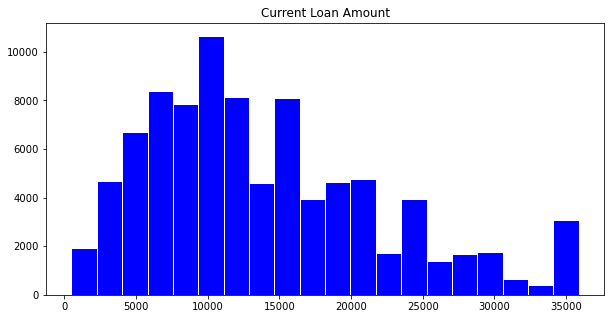

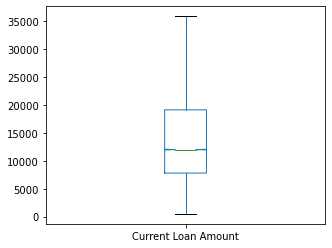

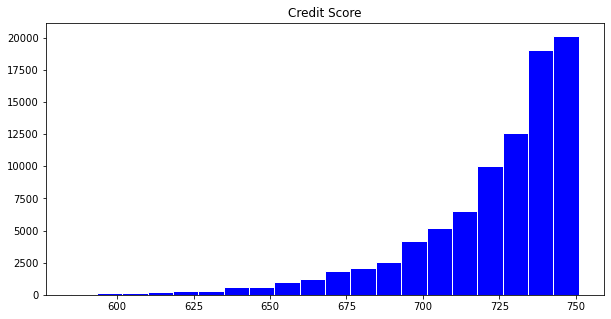

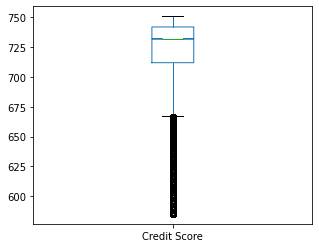

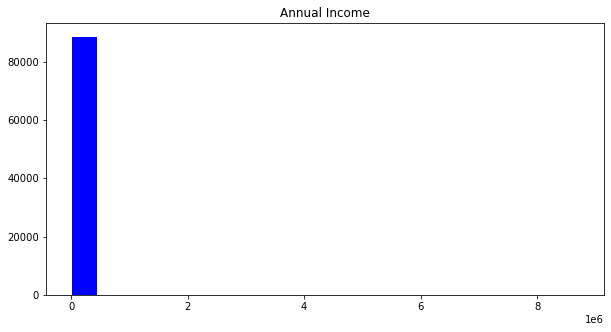

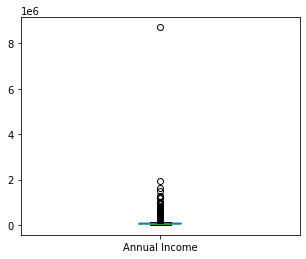

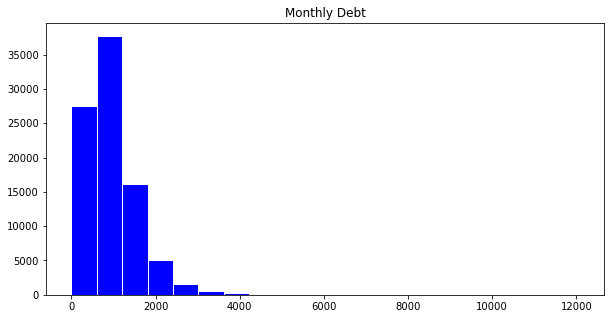

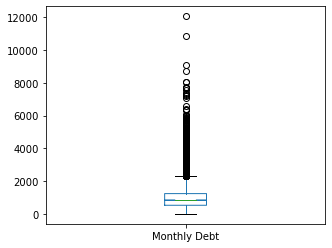

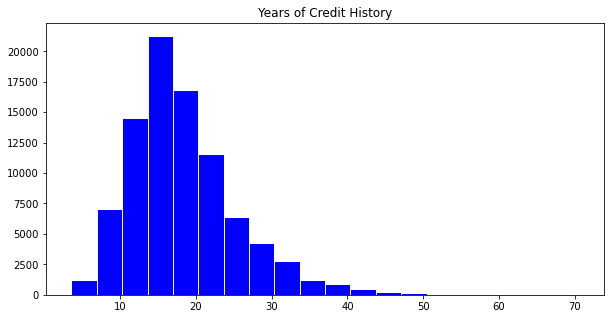

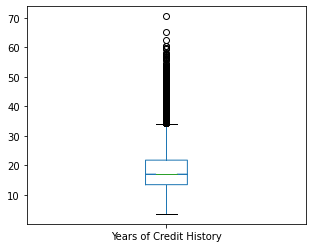

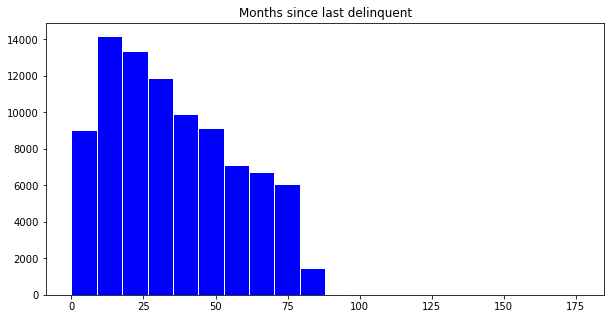

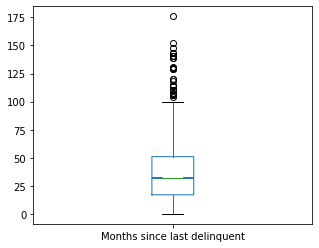

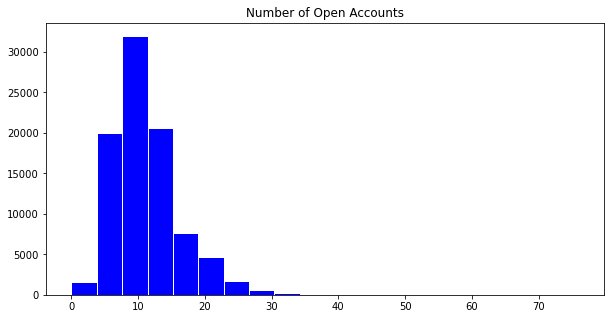

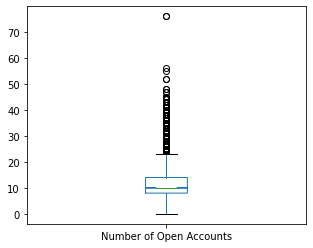

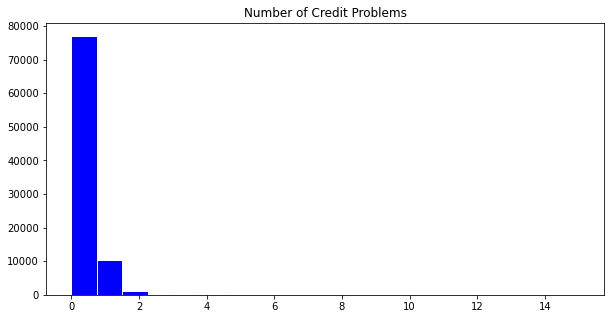

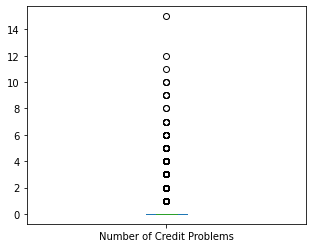

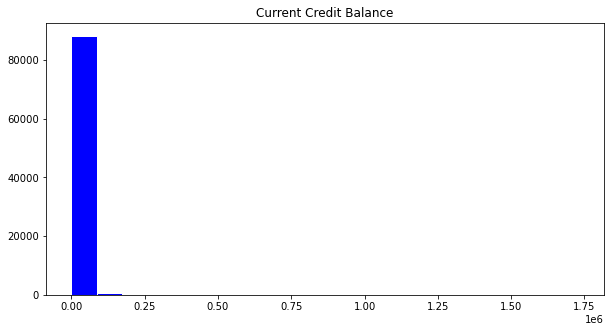

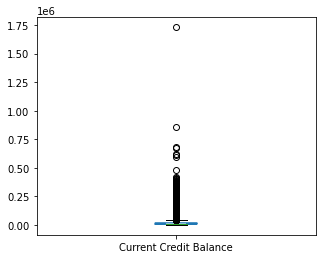

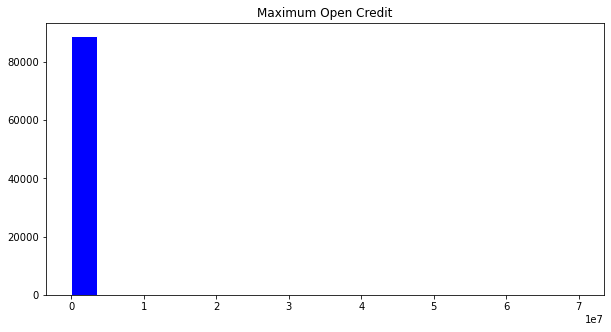

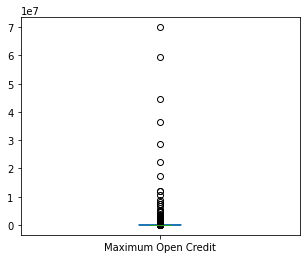

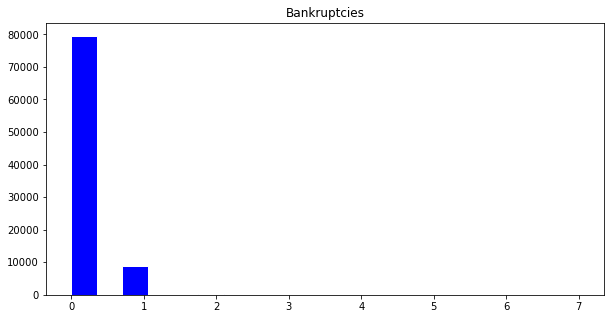

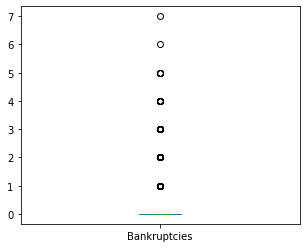

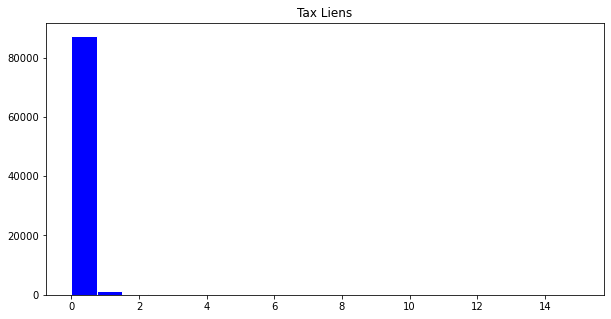

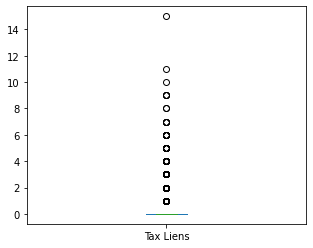

In [318]:
for col in num.columns:
    
    #histogram
    num.hist(column = col,

              grid=False,        #Do not include the grid
              figsize=(10,5),
             color="blue",
             edgecolor="White",
             bins=20)     #(Length,Height) of the plot in inches

    plt.show()

    #boxplot
    num.boxplot(column= col,
                grid= False,
                figsize=(5,4),
                notch=True)

    plt.show()

- Uni-variate Analysis of Categorical Variable

In [319]:
cate = final_imputed_loanData.select_dtypes(include='object')

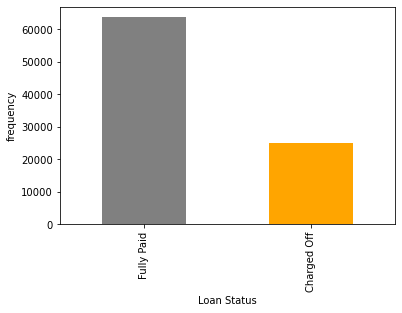

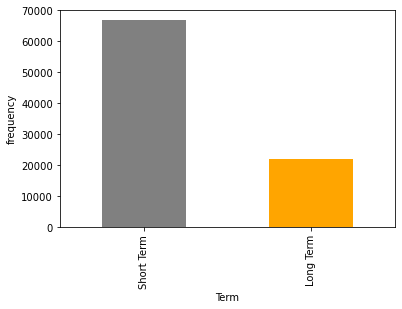

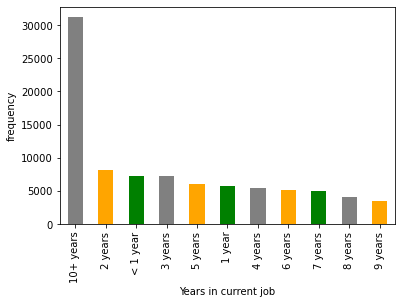

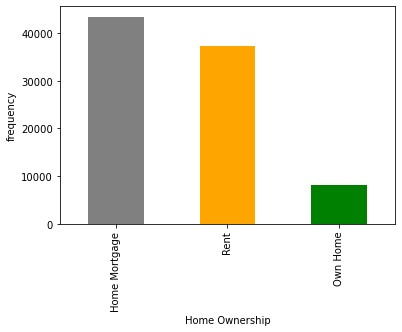

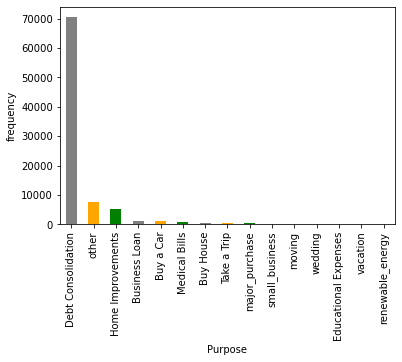

In [320]:
for col in cate.columns:
    #bar_plot
    data[col].value_counts().plot( kind='bar', xlabel=col, ylabel='frequency', color=['Grey','Orange','Green'])
    plt.show()

# Encoding of Categorical Variables

In [321]:
df = final_imputed_loanData.copy()
df

,Loan Status,Term,Years in current job,Home Ownership,Purpose,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,Short Term,< 1 year,Rent,Debt Consolidation,12232,728,46643,777.39,18.0,10,12,0,6762,7946,0,0
1,Charged Off,Long Term,10+ years,Home Mortgage,Debt Consolidation,25014,733,81099,892.09,26.7,50,14,0,35706,77961,0,0
2,Charged Off,Short Term,9 years,Home Mortgage,Home Improvements,16117,724,60438,1244.02,16.7,32,11,1,11275,14815,1,0
3,Charged Off,Short Term,3 years,Rent,Debt Consolidation,11716,740,34171,990.94,10.0,21,21,0,7009,43533,0,0
4,Charged Off,Long Term,10+ years,Home Mortgage,Home Improvements,9789,686,47003,503.71,16.7,25,13,1,16913,19553,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,Fully Paid,Short Term,10+ years,Rent,Debt Consolidation,10136,728,35476,1680.19,21.2,14,14,0,15914,28265,0,0
88906,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,29610,710,123375,934.94,15.0,16,11,0,17727,32766,0,0
88907,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,24394,746,71148,767.87,36.4,9,8,0,44728,53374,0,0
88908,Charged Off,Short Term,10+ years,Rent,Debt Consolidation,5030,722,25424,596.37,19.0,7,12,0,6374,18422,0,0


In [322]:
df.head()

,Loan Status,Term,Years in current job,Home Ownership,Purpose,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,Short Term,< 1 year,Rent,Debt Consolidation,12232,728,46643,777.39,18.0,10,12,0,6762,7946,0,0
1,Charged Off,Long Term,10+ years,Home Mortgage,Debt Consolidation,25014,733,81099,892.09,26.7,50,14,0,35706,77961,0,0
2,Charged Off,Short Term,9 years,Home Mortgage,Home Improvements,16117,724,60438,1244.02,16.7,32,11,1,11275,14815,1,0
3,Charged Off,Short Term,3 years,Rent,Debt Consolidation,11716,740,34171,990.94,10.0,21,21,0,7009,43533,0,0
4,Charged Off,Long Term,10+ years,Home Mortgage,Home Improvements,9789,686,47003,503.71,16.7,25,13,1,16913,19553,1,0


In [323]:
#Mapping 1 to charged Off and 0 to Fully paid
df['Loan Status'] = df['Loan Status'].map({'Charged Off':1,'Fully Paid':0})

In [324]:
df['Loan Status'].value_counts()

0    63737
1    25173
Name: Loan Status, dtype: int64

In [325]:
df.head()

,Loan Status,Term,Years in current job,Home Ownership,Purpose,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,Short Term,< 1 year,Rent,Debt Consolidation,12232,728,46643,777.39,18.0,10,12,0,6762,7946,0,0
1,1,Long Term,10+ years,Home Mortgage,Debt Consolidation,25014,733,81099,892.09,26.7,50,14,0,35706,77961,0,0
2,1,Short Term,9 years,Home Mortgage,Home Improvements,16117,724,60438,1244.02,16.7,32,11,1,11275,14815,1,0
3,1,Short Term,3 years,Rent,Debt Consolidation,11716,740,34171,990.94,10.0,21,21,0,7009,43533,0,0
4,1,Long Term,10+ years,Home Mortgage,Home Improvements,9789,686,47003,503.71,16.7,25,13,1,16913,19553,1,0


### One-Hot Encoding of Categorical Variables

In [326]:
cat = pd.get_dummies(df[['Term','Years in current job','Home Ownership','Purpose']],prefix=['Term','Years in current job','Home Ownership','Purpose']) 

In [327]:
num = df.select_dtypes(exclude='object') #exclude cat variables
num

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,12232,728,46643,777.39,18.0,10,12,0,6762,7946,0,0
1,1,25014,733,81099,892.09,26.7,50,14,0,35706,77961,0,0
2,1,16117,724,60438,1244.02,16.7,32,11,1,11275,14815,1,0
3,1,11716,740,34171,990.94,10.0,21,21,0,7009,43533,0,0
4,1,9789,686,47003,503.71,16.7,25,13,1,16913,19553,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,0,10136,728,35476,1680.19,21.2,14,14,0,15914,28265,0,0
88906,0,29610,710,123375,934.94,15.0,16,11,0,17727,32766,0,0
88907,0,24394,746,71148,767.87,36.4,9,8,0,44728,53374,0,0
88908,1,5030,722,25424,596.37,19.0,7,12,0,6374,18422,0,0


In [328]:
join= [num,cat] 
df = pd.concat(join,axis=1,join='inner')  #combing the one hot encoded categorical variable to rest of the predictors
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Credit Score', 'Annual Income',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Term_Long Term',
       'Term_Short Term', 'Years in current job_1 year',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years', 'Years in current job_< 1 year',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home

In [329]:
X = df.drop(["Loan Status"],axis=1)  #predictors, dropping house column (Target) to drop column axis=1
y = df["Loan Status"]
X.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,12232,728,46643,777.39,18.0,10,12,0,6762,7946,...,0,0,0,0,0,0,0,0,0,0
1,25014,733,81099,892.09,26.7,50,14,0,35706,77961,...,0,0,0,0,0,0,0,0,0,0
2,16117,724,60438,1244.02,16.7,32,11,1,11275,14815,...,1,0,0,0,0,0,0,0,0,0
3,11716,740,34171,990.94,10.0,21,21,0,7009,43533,...,0,0,0,0,0,0,0,0,0,0
4,9789,686,47003,503.71,16.7,25,13,1,16913,19553,...,1,0,0,0,0,0,0,0,0,0


# Train-Validation-Test Split

In [330]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  # X-predictors, y-target

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.10)

# Import Libraraies

In [331]:
#import LogisticRegression from Sklearn
from sklearn.linear_model import LogisticRegression
import sklearn.ensemble as ensemble #import ensemble for bagging
from sklearn.ensemble import RandomForestClassifier #import randomforest Classifier
from sklearn.ensemble import AdaBoostClassifier #import adaboostclassifer
from sklearn.tree import DecisionTreeClassifier #import Decision tree
#Area under ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report #import Scoring metric

## MODEL1: BaseLine Model - using all variables on class imbalanced data

> **a) Logistic Regression**

In [332]:
#Fitting Logistic Regression Model
model = LogisticRegression()
model.fit(X_train,y_train)

#predictions on validation data
pred_valid = model.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

lm1 = pd.DataFrame({'Logistic_Model_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
lm1

,Logistic_Model_1
Accuracy,0.728666
F1_score,0.000000
Recall,0.000000
AUROC,0.500000


> **b) Decision Tree**

In [333]:
# #Fitting Decision tree Model
# dt = DecisionTreeClassifier(max_depth=6)
# dt.fit(X_train,y_train)
# pred = dt.predict(X_valid)

# #predictions on validation data
# pred_valid = model.predict(X_valid)   
# pred_valid

# #Metrics
# Accuracy = accuracy_score(y_valid, pred_valid)
# F1_score = f1_score(y_valid, pred_valid)
# Recall_score = recall_score(y_valid, pred_valid)
# AUROC = roc_auc_score(y_valid, pred_valid)

# dt1 = pd.DataFrame({'Decision_Tree_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
#                                 index=['Accuracy','F1_score','Recall','AUROC'])

# #print(classification_report(y_valid,pred_valid))
# dt1

> **c) Pruned Decision Tree**

In [334]:
# #pruning-Finding alpha
# path = dt.cost_complexity_pruning_path(X_train, y_train)
# ccp_alphas = path.ccp_alphas
# ccp_alphas

# train_accuracy = {}         #Dictionary to store alpha and mae
# validation_accuracy = {}

# for i in ccp_alphas:
#     dt = DecisionTreeClassifier(ccp_alpha=i)
#     dt.fit(X_train,y_train)
#     pred_valid = dt.predict(X_valid)
#     pred_train = dt.predict(X_train)

#     train_accuracy[i] = accuracy_score(y_train,pred_train)
#     validation_accuracy[i] = accuracy_score(y_valid,pred_valid)

# opt_ccp = max(validation_accuracy,key = validation_accuracy.get) #Optimum Cost Complexity Parameter
# opt_ccp #optimal CCP_alphas 

In [335]:
# #Fitting pruned decision tree model using optimum alpha
# prun_dt = DecisionTreeClassifier(ccp_alpha=opt_ccp) 

# prun_dt.fit(X_train,y_train)
# pred = prun_dt.predict(X_valid)

# #predictions on validation data
# pred_valid = model.predict(X_valid)   
# pred_valid

# #Metrics
# Accuracy = accuracy_score(y_valid, pred_valid)
# F1_score = f1_score(y_valid, pred_valid)
# Recall_score = recall_score(y_valid, pred_valid)
# AUROC = roc_auc_score(y_valid, pred_valid)

# pdt1 = pd.DataFrame({'Pruned_Decision_Tree_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
#                                 index=['Accuracy','F1_score','Recall','AUROC'])

# #print(classification_report(y_valid,pred_valid))
# pdt1

> **d) Random Forest**

In [336]:
# #Fitting Random Forest Model
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train) 
# pred = rf.predict(X_valid)

# #predictions on validation data
# pred_valid = model.predict(X_valid)   
# pred_valid

# #Metrics
# Accuracy = accuracy_score(y_valid, pred_valid)
# F1_score = f1_score(y_valid, pred_valid)
# Recall_score = recall_score(y_valid, pred_valid)
# AUROC = roc_auc_score(y_valid, pred_valid)

# rf1 = pd.DataFrame({'Random_Forest_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
#                                 index=['Accuracy','F1_score','Recall','AUROC'])

# #print(classification_report(y_valid,pred_valid))
# rf1

> **e) Adaboost**

In [337]:
# #Fitting Adaboost Model
# ada_boost = AdaBoostClassifier()
# ada_boost.fit(X_train, y_train) 
# pred = ada_boost.predict(X_valid)

# #predictions on validation data
# pred_valid = model.predict(X_valid)   
# pred_valid

# #Metrics
# Accuracy = accuracy_score(y_valid, pred_valid)
# F1_score = f1_score(y_valid, pred_valid)
# Recall_score = recall_score(y_valid, pred_valid)
# AUROC = roc_auc_score(y_valid, pred_valid)

# adb1 = pd.DataFrame({'Adaboost_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
#                                 index=['Accuracy','F1_score','Recall','AUROC'])

# #print(classification_report(y_valid,pred_valid))
# adb1

## MODEL2: Model on Class-Balanced data using SMOTE

In [338]:
#pip install imblearn

In [339]:
#import SMOTE module from imblearn library
#pip install imblearn #(if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [340]:
y_train.value_counts() #Class imbalanced data

0    45974
1    18041
Name: Loan Status, dtype: int64

In [341]:
y_train = pd.DataFrame(y_train_res)
X_train = pd.DataFrame(X_train_res)

In [342]:
y_train.value_counts() #Oversampling using smote balanced the class

0    45974
1    45974
dtype: int64

### Using Information Value to Choose Variables

In [343]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [344]:
iv = iv_woe(df,"Loan Status",bins=10,show_woe=False)

Information value of Current Loan Amount is 0.023709
Information value of Credit Score is 0.22192
Information value of Annual Income is 0.031996
Information value of Monthly Debt is 0.003314
Information value of Years of Credit History is 0.012882
Information value of Months since last delinquent is 0.001596
Information value of Number of Open Accounts is 0.001901
Information value of Number of Credit Problems is 0.000516
Information value of Current Credit Balance is 0.003387
Information value of Maximum Open Credit is 0.024533
Information value of Bankruptcies is 6.4e-05
Information value of Tax Liens is 0.0
Information value of Term_Long Term is 0.143059
Information value of Term_Short Term is 0.143059
Information value of Years in current job_1 year is 6.1e-05
Information value of Years in current job_10+ years is 2e-06
Information value of Years in current job_2 years is 0.000357
Information value of Years in current job_3 years is 0.000338
Information value of Years in current jo